#### Audio Classification Data Preprocessing

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [85]:
import numpy as np
import pandas as pd
import numpy as np
import os
import contextlib
from tqdm import tqdm
import wave
import librosa

In [86]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
    mfccs_1 = librosa.feature.delta(mfccs_features)
    mfccs_2 = librosa.feature.delta(mfccs_features,order =2)
    new_mfcc = np.concatenate((mfccs_features,mfccs_1,mfccs_2))
    mfccs_scaled_features = np.mean(new_mfcc.T,axis=0)    
    return mfccs_scaled_features
    

In [87]:

extracted_features=[]


### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
metadata=pd.read_csv('../../Thesis/Data/Urban4k/Dataset1/UrbanSound8K.csv')
audio_dataset_path='../../Thesis/Data/Urban4k/Dataset1/'
cnt=0
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    if final_class_labels == 'gun_shot':
        try:
            with contextlib.closing(wave.open( file_name,'r')) as f:
                    frames = f.getnframes()
                    rate = f.getframerate()
                    duration = frames / float(rate)
        #print(wav,sr)
        #librosa.display.waveplot(wav, sr)
        #plt.colorbar()
        #plt.close()
                    if duration ==4.0:
                        cnt+=1
                        data=features_extractor(file_name)
                        extracted_features.append([data,'gun_shot'])
        except:
            pass
print(cnt)
        


In [88]:
#For GunSHot


path = '../../Thesis/New dataset Creation/gun shot/'
files = os.listdir(path)

for f in files:
    file_name = os.path.join(os.path.abspath(path),str(f))
    
    data=features_extractor(file_name)

    extracted_features.append([data,'gun_shot'])
    print()


In [89]:
import numpy as np
import contextlib
from tqdm import tqdm
import wave
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
metadata=pd.read_csv('../../Thesis/Data/Urban4k/Dataset1 - Copy/UrbanSound8K.csv')
audio_dataset_path='../../Thesis/Data/Urban4k/Dataset1 - Copy/'
cnt=0
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    if final_class_labels == 'gun_shot':
        
        try:
            with contextlib.closing(wave.open( file_name,'r')) as f:
                    frames = f.getnframes()
                    rate = f.getframerate()
                    duration = frames / float(rate)
                    #print(duration)
        #print(wav,sr)
        #librosa.display.waveplot(wav, sr)
        #plt.colorbar()
        #plt.close()
                    if duration >=1.5:
                        cnt+=1
                        data=features_extractor(file_name)
                        extracted_features.append([data,'gun_shot'])
        except:
            pass
print(cnt)
        


8732it [00:04, 2180.33it/s]

124


In [90]:

#C:\Users\mohia\Documents\Thesis\New dataset Creation\axe sound
path = '../../Thesis/New dataset Creation/axe sound/'
files = os.listdir(path)

cnt=0
for f in files:
    file_name = os.path.join(os.path.abspath(path),str(f))

    data=features_extractor(file_name)
    cnt+=1
    extracted_features.append([data,'tree_cutting'])

print(cnt)


292


In [91]:
import numpy as np
import contextlib
from tqdm import tqdm
import wave
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
metadata=pd.read_csv('../../Thesis/Data/Urban4k/Dataset1/UrbanSound8K.csv')
audio_dataset_path='../../Thesis/Data/Urban4k/Dataset1/'
cnt=0
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    if final_class_labels == 'drilling':
        try:
            with contextlib.closing(wave.open( file_name,'r')) as f:
                    frames = f.getnframes()
                    rate = f.getframerate()
                    duration = frames / float(rate)
        #print(wav,sr)
        #librosa.display.waveplot(wav, sr)
        #plt.colorbar()
        #plt.close()
                    if duration ==4.0 and cnt < 70:
                        cnt+=1
                        data=features_extractor(file_name)
                        extracted_features.append([data,'tree_cutting'])
        except:
            pass
print(cnt)
        


8732it [00:03, 2275.23it/s]

70


In [92]:
import numpy as np
import contextlib
from tqdm import tqdm
import wave
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients

cnt=0
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    if final_class_labels == 'jackhammer':
        try:
            with contextlib.closing(wave.open( file_name,'r')) as f:
                    frames = f.getnframes()
                    rate = f.getframerate()
                    duration = frames / float(rate)
        #print(wav,sr)
        #librosa.display.waveplot(wav, sr)
        #plt.colorbar()
        #plt.close()
                    if duration ==4.0 and cnt < 60:
                        cnt+=1
                        data=features_extractor(file_name)
                        extracted_features.append([data,'tree_cutting'])
        except:
            pass
print(cnt)
        


8732it [00:03, 2772.32it/s]

60


In [93]:
metadata = pd.read_csv('../ESC-50-master/meta/esc50.csv')


import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients

cnt = 0
for index_num,row in tqdm(metadata.iterrows()):
    
    if row['category'] == 'chainsaw':
        data = features_extractor( '../ESC-50-master/audio/'+ row["filename"])
        cnt+=1
        extracted_features.append([data,'tree_cutting'])
        
print(cnt)
 

2000it [00:01, 1051.29it/s]

40


In [94]:
metadata = pd.read_csv('../ESC-50-master/meta/esc50.csv')


cnt = 0
for index_num,row in tqdm(metadata.iterrows()):
    
    if row['category'] == 'hand_saw':
      
        cnt+=1
        data = features_extractor( '../ESC-50-master/audio/'+ row["filename"])
        extracted_features.append([data,'tree_cutting'])

    
print(cnt)
 

2000it [00:01, 1054.62it/s]

40


In [95]:

#C:\Users\mohia\Documents\Thesis\New dataset Creation\axe sound
path = '../../Thesis/New dataset Creation/bg noise/'
files = os.listdir(path)

count = 0
for f in files:
    if count > 400:
        break
    else:
        file_name = os.path.join(os.path.abspath(path),str(f))

        data=features_extractor(file_name)
        
        extracted_features.append([data,'bg_noise'])
        count=count+1
        
print(count)
    

401


In [96]:
metadata['category'].unique()

array(['dog', 'chirping_birds', 'vacuum_cleaner', 'thunderstorm',
       'door_wood_knock', 'can_opening', 'crow', 'clapping', 'fireworks',
       'chainsaw', 'airplane', 'mouse_click', 'pouring_water', 'train',
       'sheep', 'water_drops', 'church_bells', 'clock_alarm',
       'keyboard_typing', 'wind', 'footsteps', 'frog', 'cow',
       'brushing_teeth', 'car_horn', 'crackling_fire', 'helicopter',
       'drinking_sipping', 'rain', 'insects', 'laughing', 'hen', 'engine',
       'breathing', 'crying_baby', 'hand_saw', 'coughing',
       'glass_breaking', 'snoring', 'toilet_flush', 'pig',
       'washing_machine', 'clock_tick', 'sneezing', 'rooster',
       'sea_waves', 'siren', 'cat', 'door_wood_creaks', 'crickets'],
      dtype=object)

In [97]:
metadata = pd.read_csv('../ESC-50-master/meta/esc50.csv')


cnt = 0
for index_num,row in tqdm(metadata.iterrows()):
    
    if row['category'] in ['cat','pig','crow','hen','rain','wind','sea_waves']:

        cnt+=1
        data = features_extractor( '../ESC-50-master/audio/'+ row["filename"])
        extracted_features.append([data,'bg_noise'])
    
print(cnt)
 

2000it [00:12, 162.56it/s]

280


In [98]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.tail()

,feature,class
1781,"[-446.21368, 21.95397, -5.3842106, 6.9660892, ...",bg_noise
1782,"[-424.36374, 15.846222, -4.535247, 1.4702482, ...",bg_noise
1783,"[-151.68239, 124.86681, -83.18654, 12.285122, ...",bg_noise
1784,"[-202.40575, 137.02861, -51.016354, 5.902079, ...",bg_noise
1785,"[-212.76106, 128.5414, -58.30925, 7.472452, -8...",bg_noise


In [99]:
extracted_features_df.feature[0]

array([-3.30508545e+02,  1.15607994e+02,  9.54413128e+00,  1.84034481e+01,
        6.30413866e+00,  1.05801191e+01,  3.63476396e+00,  5.80019712e+00,
        2.24023566e-01,  7.07113457e+00, -5.20546377e-01,  1.78748333e+00,
        2.32202315e+00, -2.85207242e-01, -1.99906558e-01,  6.14106283e-02,
        2.31983587e-02, -1.33113256e-02,  1.97519921e-02, -5.52207269e-02,
       -6.67266101e-02, -4.74797077e-02, -2.17211973e-02,  8.33630189e-03,
        8.26903153e-03,  2.80040130e-02,  1.43390698e-02,  8.61242041e-03,
       -5.92772737e-02, -2.71607284e-03,  3.14178839e-02, -5.39066177e-03,
        3.86844240e-02,  1.70796469e-03,  1.11868614e-02, -2.44536176e-02,
       -2.05750763e-02,  2.26225387e-02, -4.02198732e-02], dtype=float32)

In [100]:
extracted_features_df['class'].value_counts()

bg_noise        681
gun_shot        603
tree_cutting    502
Name: class, dtype: int64

In [101]:
extracted_features_df = extracted_features_df.replace({'gun': 'gun_shot'})

C:\Users\mohia\anaconda3\lib\site-packages\pandas\core\internals\managers.py:1976: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  op = lambda x: operator.eq(x, b)


In [102]:
extracted_features_df['feature']
df_feature = pd.DataFrame(extracted_features_df, columns = ['feature', 'class'])

In [103]:
df_feature.to_csv('data.csv')

In [104]:
extracted_features_df.shape

(1786, 2)

In [105]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [106]:
y

array(['gun_shot', 'gun_shot', 'gun_shot', ..., 'bg_noise', 'bg_noise',
       'bg_noise'], dtype='<U12')

In [107]:
X[1]

array([-2.16200455e+02,  1.21176140e+02, -3.94936204e+00,  3.13326416e+01,
        2.64041638e+00,  1.41369886e+01, -1.20108461e+00,  8.06697655e+00,
       -1.56819499e+00,  7.84995508e+00, -1.25789809e+00,  6.63636303e+00,
       -1.26824260e+00, -1.31954801e+00,  3.06188494e-01, -1.17735870e-01,
       -1.47549817e-02, -3.27989385e-02, -7.47528151e-02,  8.44035149e-02,
       -1.09027036e-01,  1.02222189e-01, -1.50640294e-01, -2.53695510e-02,
       -1.10794269e-01,  4.47613373e-02,  9.01006442e-03, -4.60263565e-02,
        3.86068318e-03, -5.02499118e-02,  1.43441847e-02, -5.28500415e-03,
        1.70429039e-03, -2.83143762e-02, -1.22083677e-02, -4.98115830e-03,
       -5.31034544e-03, -9.14367195e-03, -2.37295665e-02], dtype=float32)

In [108]:

y = pd.DataFrame(y,columns=['class'])
y=y.replace({'gun_shot':1, 'bg_noise':0,'tree_cutting':2 })
y=pd.DataFrame(y).to_numpy()


In [109]:
X

array([[-3.30508545e+02,  1.15607994e+02,  9.54413128e+00, ...,
        -2.05750763e-02,  2.26225387e-02, -4.02198732e-02],
       [-2.16200455e+02,  1.21176140e+02, -3.94936204e+00, ...,
        -5.31034544e-03, -9.14367195e-03, -2.37295665e-02],
       [-1.40536957e+02,  9.56999969e+01, -3.31328659e+01, ...,
         4.25882377e-02,  6.13756245e-04,  3.47413979e-02],
       ...,
       [-1.51682388e+02,  1.24866814e+02, -8.31865387e+01, ...,
         5.63963093e-02, -3.16941529e-03,  5.99954836e-02],
       [-2.02405746e+02,  1.37028610e+02, -5.10163536e+01, ...,
         2.09758128e-03, -2.56852526e-02, -2.76466366e-02],
       [-2.12761063e+02,  1.28541397e+02, -5.83092499e+01, ...,
        -4.67717228e-03, -5.87908439e-02, -6.50631730e-03]], dtype=float32)

In [110]:
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [111]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [112]:
X_train.shape

(1428, 39)

In [113]:
y_train.shape

(1428, 1)

In [114]:
X_train[0]

array([-3.59401337e+02,  1.23108932e+02, -5.02857590e+00,  2.74185734e+01,
       -3.22233886e-02,  2.75412197e+01, -8.76392746e+00,  6.17953730e+00,
       -1.04287615e+01,  2.28342094e+01, -1.25189781e+01,  1.52164669e+01,
       -4.69993162e+00,  6.30829670e-03, -5.07222340e-02,  3.24691832e-02,
       -3.00507601e-02, -1.11011133e-01,  1.12833669e-02, -1.38679682e-03,
       -7.39808828e-02, -3.14055532e-02, -1.55831818e-02, -9.67907757e-02,
        2.34390260e-03, -3.45676728e-02, -1.77982956e-01, -2.89920531e-03,
        1.88743435e-02,  8.15163553e-03, -3.79076786e-02, -7.64176324e-02,
        3.19998525e-02, -5.94338926e-04, -2.95232981e-02, -2.00743563e-02,
        6.15973845e-02,  1.28710009e-02,  6.14205413e-02], dtype=float32)

In [115]:
y_test.shape

(358, 1)

In [116]:
X_train.shape

(1428, 39)

In [117]:
X_test.shape

(358, 39)

In [118]:
y_train.shape

(1428, 1)

In [119]:
y_test.shape

(358, 1)

### Model Creation

In [120]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
forest = RandomForestClassifier(max_depth=17, random_state=13)
forest.fit(X_train, y_train)
y_pred_test = forest.predict(X_test)
accuracy_score(y_test, y_pred_test)

<ipython-input-120-ba17b95aac63>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


0.9134078212290503

In [121]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=16, shuffle=True, random_state=23)
accuracy_score=[]
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    forest.fit(x_train_fold, y_train_fold)
    accuracy_score.append(forest.score(x_test_fold, y_test_fold))

<ipython-input-121-337781fa80af>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train_fold, y_train_fold)
<ipython-input-121-337781fa80af>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train_fold, y_train_fold)
<ipython-input-121-337781fa80af>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train_fold, y_train_fold)
<ipython-input-121-337781fa80af>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train_fold, y_train_fold)
<ipython-input-121-337781fa80af>:7: DataConversionWarning: A column-vect

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [122]:
score = np.array(accuracy_score)
score.mean()

0.9098244449806949

In [123]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.91 accuracy with a standard deviation of 0.03


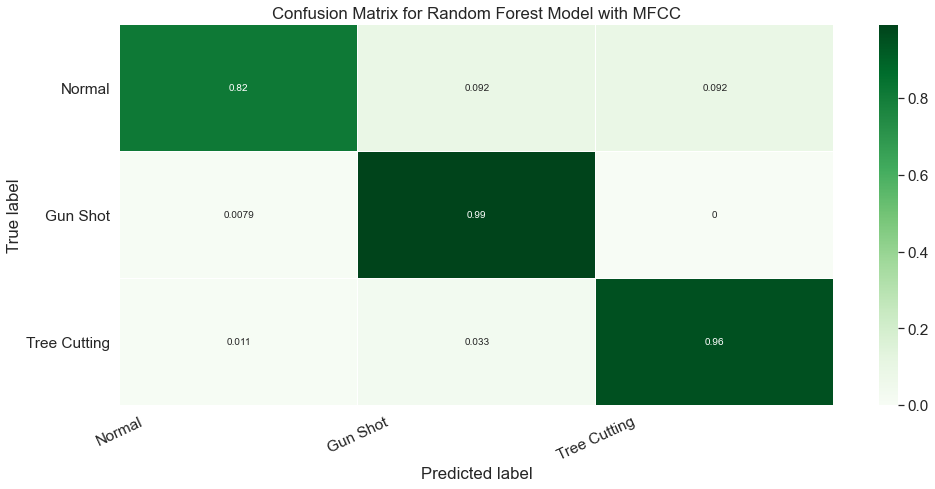

In [304]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test, y_pred_test)

matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Normal','Gun Shot','Tree Cutting']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model with MFCC')
plt.show()

In [125]:
#Model accuracy on test data
from sklearn.metrics import classification_report
target_names = ['Normal', 'Gunshot', 'Tree Cutting']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.98      0.82      0.89       141
     Gunshot       0.89      0.99      0.94       127
Tree Cutting       0.87      0.96      0.91        90

    accuracy                           0.91       358
   macro avg       0.91      0.92      0.91       358
weighted avg       0.92      0.91      0.91       358



In [313]:
y_train_test = forest.predict(X_train)

In [314]:
#Model accuracy on train DATA
from sklearn.metrics import classification_report
target_names = ['Normal', 'Gunshot', 'Tree Cutting']
print(classification_report(y_train,y_train_test , target_names=target_names))

              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99       540
     Gunshot       0.99      1.00      1.00       476
Tree Cutting       0.99      0.99      0.99       412

    accuracy                           0.99      1428
   macro avg       0.99      0.99      0.99      1428
weighted avg       0.99      0.99      0.99      1428



# GradientBoostingclassifier

In [ ]:
r_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
 
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

In [134]:
from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1,max_depth=5, random_state=10)


In [135]:
accuracy_score_xgb =[]
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_score=[]
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    xgb.fit(x_train_fold, y_train_fold)
    accuracy_score_xgb.append(forest.score(x_test_fold, y_test_fold))

C:\Users\mohia\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\mohia\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\mohia\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\mohia\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [308]:
score = np.array(accuracy_score_xgb)
score.mean()

0.9943977591036415

In [309]:
y_pred_xgb = xgb.predict(X_test)

from sklearn.metrics import classification_report
target_names = ['Normal', 'Gunshot', 'Tree Cutting']
print(classification_report(y_test, y_pred_xgb, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.95      0.84      0.89       141
     Gunshot       0.87      0.99      0.93       127
Tree Cutting       0.94      0.92      0.93        90

    accuracy                           0.92       358
   macro avg       0.92      0.92      0.92       358
weighted avg       0.92      0.92      0.92       358



In [315]:
y_train_xgb = xgb.predict(X_train)

from sklearn.metrics import classification_report
target_names = ['Normal', 'Gunshot', 'Tree Cutting']
print(classification_report(y_train, y_train_xgb, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.95      0.86      0.91       540
     Gunshot       0.88      0.99      0.93       476
Tree Cutting       0.94      0.92      0.93       412

    accuracy                           0.92      1428
   macro avg       0.92      0.92      0.92      1428
weighted avg       0.92      0.92      0.92      1428



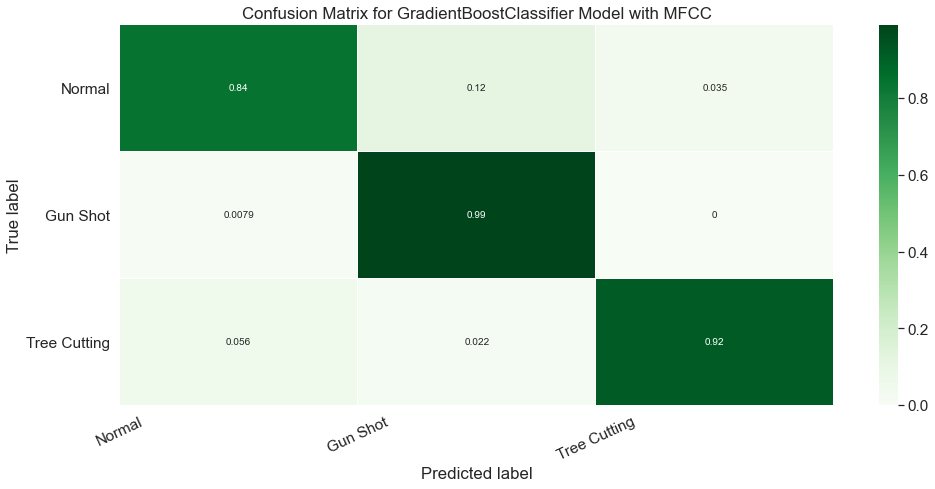

In [303]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test, y_pred_xgb)

matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Normal','Gun Shot','Tree Cutting']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for GradientBoostClassifier Model with MFCC')
plt.show() 

In [283]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [284]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [285]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(39,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###final layer
model.add(Dense(3))
model.add(Activation('softmax'))

In [141]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               4000      
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_5 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)              

In [286]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

cnn_y_test = []
for i in y_test:
    
    if i == [0]:
        print(i)
        cnn_y_test.append([1,0,0])
    elif i == [1]:
        print(i)
        cnn_y_test.append([0,1,0])
    else:
        
        cnn_y_test.append([0,0,1])
                

cnn_y_train = []
for i in y_train:
    if i == [0]:
        cnn_y_train.append([1,0,0])
    elif i == [1]:
          cnn_y_train.append([0,1,0])
    else:
          cnn_y_train.append([0,0,1])
          
        

cnn_y_train=np.array(cnn_y_train)
cnn_y_test=np.array(cnn_y_test)


cnn_y_test

In [143]:
X_train.dtype

dtype('float32')

## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train,cnn_y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, cnn_y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)


In [287]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

kfold = KFold(10, shuffle=True, random_state=42)
oos_y = []
oos_pred = []
fold = 0
EPOCHS =50
# Must specify y StratifiedKFold for


for train, test in kfold.split(extracted_features_df):
    fold+=1
    print(f"Fold #{fold}")
        
    xx_train = np.array(extracted_features_df.iloc[train]['feature'].to_list())
    
    _train = extracted_features_df.iloc[train]['class'].to_list()
    yy_train = []
    for i in _train:
        if i == 'gun_shot':
            yy_train.append([0,1,0])
        elif i == 'bg_noise':
            yy_train.append([1,0,0])   
        elif i == 'tree_cutting':
            yy_train.append([0,0,1])
    yy_train = np.array(yy_train)
    #print(y_train)

    xx_test = np.array(extracted_features_df.iloc[test]['feature'].to_list())
    
    _test = extracted_features_df.iloc[test]['class'].to_list()
    yy_test = []
    for i in _test:
        if i == 'gun_shot':
            yy_test.append([0,1,0])
        elif i == 'bg_noise':
            yy_test.append([1,0,0])
            
        elif i == 'tree_cutting':
            yy_test.append([0,0,1])
    yy_test = np.array(yy_test)
    


    model.fit(xx_train,yy_train,validation_data=(xx_test,yy_test),
              verbose=0, epochs=EPOCHS)
    
    pred = model.predict(xx_test)
    
    oos_y.append(yy_test)
    # raw probabilities to chosen class (highest probability)
    pred = np.argmax(pred,axis=1) 
    oos_pred.append(pred)  

    # Measure this fold's accuracy
    y_compare = np.argmax(yy_test,axis=1) # For accuracy calculation
    score = metrics.accuracy_score(y_compare, pred)
    print(f"Fold score (accuracy): {score}")

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
oos_y_compare = np.argmax(oos_y,axis=1) # For accuracy calculation

score = metrics.accuracy_score(oos_y_compare, oos_pred)
print(f"Final score (accuracy): {score}")    

#oosDF.to_csv(filename_write,index=False)

Fold #1
Fold score (accuracy): 0.7877094972067039
Fold #2
Fold score (accuracy): 0.88268156424581
Fold #3
Fold score (accuracy): 0.9050279329608939
Fold #4
Fold score (accuracy): 0.9329608938547486
Fold #5
Fold score (accuracy): 0.9162011173184358
Fold #6
Fold score (accuracy): 0.9664804469273743
Fold #7
Fold score (accuracy): 0.949438202247191
Fold #8
Fold score (accuracy): 0.9550561797752809
Fold #9
Fold score (accuracy): 0.9775280898876404
Fold #10
Fold score (accuracy): 0.9719101123595506
Final score (accuracy): 0.9244120940649496


In [145]:
X_test.shape
y_test.shape

(358, 1)

In [288]:
y_pred_cnn= (np.argmax(model.predict(X_test),axis=1))

In [289]:
#Model accuracy on test data
from sklearn.metrics import classification_report
target_names = ['Normal', 'Gunshot', 'Tree Cutting']
print(classification_report(y_test, y_pred_cnn, target_names=target_names))

              precision    recall  f1-score   support

      Normal       1.00      0.98      0.99       141
     Gunshot       0.98      0.99      0.99       127
Tree Cutting       0.97      0.99      0.98        90

    accuracy                           0.99       358
   macro avg       0.98      0.99      0.99       358
weighted avg       0.99      0.99      0.99       358



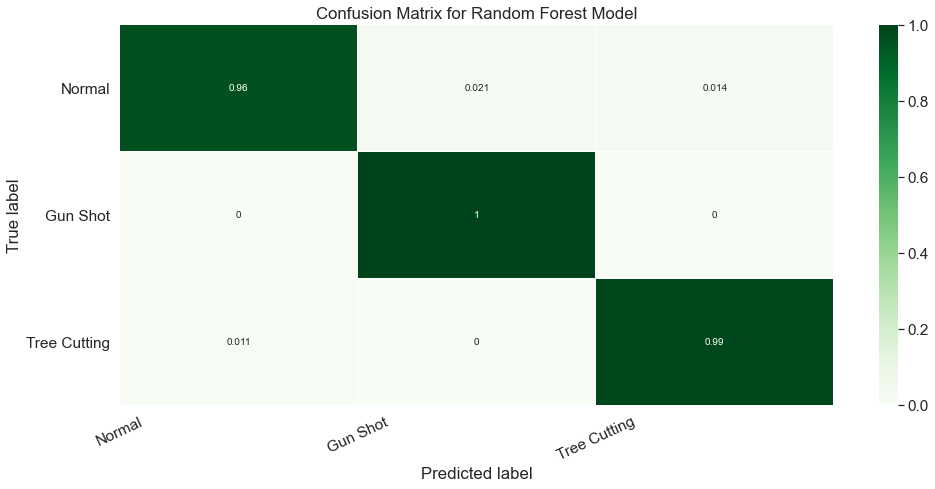

In [148]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test, y_pred_cnn)

matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Normal','Gun Shot','Tree Cutting']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

y=[]
for i in cnn_y_test:
    
    if i[0] > i[2] and i[0] > i[1]:
        y.append('Normal')
  
    elif i[1]> i[0] and i[1] > i[2]:
        y.append('Gun shot')
    else:
        y.append('Tree Cutting')


# Testing

In [63]:
test_result = []
test_f = []


In [64]:
import shutil, os
#C:\Users\mohia\Documents\Thesis\New dataset Creation\axe sound
path = '../../Thesis/Test_Dataset/bg_noise'
files = os.listdir(path)

cnt=1
for f in files:
        file_name = os.path.join(os.path.abspath(path),str(f))   
        cnt+=1
        data=features_extractor(file_name)     
        test_f.append([data,'bg_noise'])
        
print(cnt)
          

    

62


In [65]:

#C:\Users\mohia\Documents\Thesis\New dataset Creation\axe sound
path = '../../Thesis/Test_Dataset/gun_shot'
files = os.listdir(path)
cnt=1
for f in files:
    file_name = os.path.join(os.path.abspath(path),str(f))
    data=features_extractor(file_name)
    cnt+=1
    test_f.append([data,'gun_shot'])

print(cnt)

58


In [66]:
path = '../../Thesis/Test_Dataset/tree_Cutting'
files = os.listdir(path)
cnt=1
for f in files:
    file_name = os.path.join(os.path.abspath(path),str(f))

    data=features_extractor(file_name)
    cnt+=1
    test_f.append([data,'tree_cutting'])

print(cnt)

51


In [67]:
extracted_features_test_df=pd.DataFrame(test_f,columns=['feature','class'])
extracted_features_test_df.head(5)

,feature,class
0,"[-334.99936, 96.11043, -5.1747766, 30.314877, ...",bg_noise
1,"[-362.49042, 109.4039, 17.145575, 39.450928, -...",bg_noise
2,"[-369.1283, 138.5739, 10.407378, 35.273945, -1...",bg_noise
3,"[-367.98224, 129.04861, 3.0153317, 33.253826, ...",bg_noise
4,"[-352.7383, 122.01463, -7.2907166, 25.239681, ...",bg_noise


In [316]:
extracted_features_test_df['class'].value_counts()

bg_noise        61
gun_shot        57
tree_cutting    50
Name: class, dtype: int64

In [68]:
### Split the dataset into independent and dependent dataset
final_x_test=np.array(extracted_features_test_df['feature'].tolist())
final_y_test=np.array(extracted_features_test_df['class'].tolist())

In [69]:
final_y_test

array(['bg_noise', 'bg_noise', 'bg_noise', 'bg_noise', 'bg_noise',
       'bg_noise', 'bg_noise', 'bg_noise', 'bg_noise', 'bg_noise',
       'bg_noise', 'bg_noise', 'bg_noise', 'bg_noise', 'bg_noise',
       'bg_noise', 'bg_noise', 'bg_noise', 'bg_noise', 'bg_noise',
       'bg_noise', 'bg_noise', 'bg_noise', 'bg_noise', 'bg_noise',
       'bg_noise', 'bg_noise', 'bg_noise', 'bg_noise', 'bg_noise',
       'bg_noise', 'bg_noise', 'bg_noise', 'bg_noise', 'bg_noise',
       'bg_noise', 'bg_noise', 'bg_noise', 'bg_noise', 'bg_noise',
       'bg_noise', 'bg_noise', 'bg_noise', 'bg_noise', 'bg_noise',
       'bg_noise', 'bg_noise', 'bg_noise', 'bg_noise', 'bg_noise',
       'bg_noise', 'bg_noise', 'bg_noise', 'bg_noise', 'bg_noise',
       'bg_noise', 'bg_noise', 'bg_noise', 'bg_noise', 'bg_noise',
       'bg_noise', 'gun_shot', 'gun_shot', 'gun_shot', 'gun_shot',
       'gun_shot', 'gun_shot', 'gun_shot', 'gun_shot', 'gun_shot',
       'gun_shot', 'gun_shot', 'gun_shot', 'gun_shot', 'gun_sh

In [70]:

final_y_test = pd.DataFrame(final_y_test,columns=['class'])
final_y_test=final_y_test.replace({'gun_shot':1, 'bg_noise':0,'tree_cutting':2 })
final_y_test=pd.DataFrame(final_y_test).to_numpy()

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [290]:

forest_y_pred_test = forest.predict(final_x_test)
model_y_pred_test = model.predict(final_x_test)


In [73]:
model_y_pred_test

array([[1.00000000e+00, 1.34450281e-15, 2.37818459e-10],
       [1.00000000e+00, 0.00000000e+00, 1.16547604e-30],
       [1.00000000e+00, 1.00921298e-22, 1.18207802e-16],
       [1.00000000e+00, 8.18868578e-21, 3.19261863e-14],
       [1.00000000e+00, 1.60408738e-19, 5.98646837e-14],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.30913550e-23, 9.12259143e-16],
       [9.99988794e-01, 2.48646614e-07, 1.10084338e-05],
       [1.00000000e+00, 3.74990989e-37, 5.03602608e-26],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.89366297e-22, 4.95241741e-16],
       [9.99841213e-01, 8.04795127e-05, 7.83027426e-05],
       [1.00000000e+00, 0.00000000e+00, 4.57265788e-25],
       [1.00000000e+00, 1.39597835e-37, 1.37950363e-23],
       [1.00000000e+00, 3.47019421e-35, 1.49848345e-22],
       [1.00000000e+00, 1.21820290e-29, 5.78258185e-19],
       [1.00000000e+00, 0.00000000e+00, 3.82103255e-34],
       [1.00000000e+00, 0.00000

In [294]:
jh =np.argmax(model_y_pred_test,axis=1)

In [299]:
jh

array([2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [74]:
forest_y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

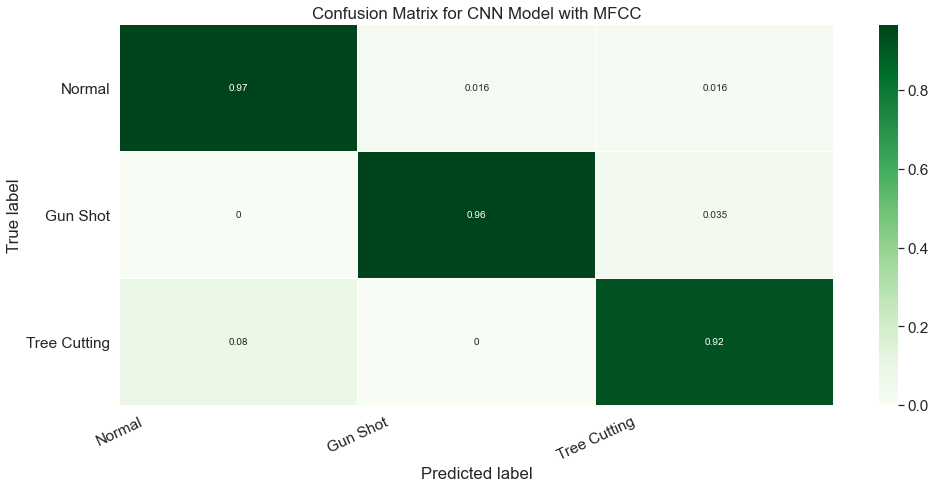

In [302]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(final_y_test, jh)
#print(accuracy_score(final_y_test, forest_y_pred_test))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Normal','Gun Shot','Tree Cutting']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for CNN Model with MFCC')
plt.show()

In [310]:
#Model accuracy on test data
from sklearn.metrics import classification_report
target_names = ['Normal', 'Gunshot', 'Tree Cutting']
print(classification_report(final_y_test, jh, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.94      0.97      0.95        61
     Gunshot       0.98      0.96      0.97        57
Tree Cutting       0.94      0.92      0.93        50

    accuracy                           0.95       168
   macro avg       0.95      0.95      0.95       168
weighted avg       0.95      0.95      0.95       168



In [168]:
%store -r output
%store -r output_svm_cnn

In [174]:
output[167]

2

In [176]:
%store final_y_test

Stored 'final_y_test' (ndarray)


In [181]:
svg_op = xgb.predict(final_x_test)

In [182]:
svg_op

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [80]:
cnn_op = model_y_pred_test.argmax(axis=1)
forest_op = forest_y_pred_test

In [178]:
forest_op

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [177]:
cnn_op

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [180]:
output[167]
cnn_op[167]

2

In [317]:
final_output = []
cnt = 0
for i in range(168):
 
    cnt+=1
    
    var0 = 0 
    var1 = 0
    var2 =0
    #for cnn model on mfcc
    if cnn_op[i]== 0:
        var0 +=1*.96
    if cnn_op[i] ==1:
        var1 +=1
    if cnn_op[i] == 2:
        var2 +=1*.99
    #for random forest model on mfcc    
    if forest_op[i]== 0:
        var0 +=1*.82
    if forest_op[i] ==1:
        var1 +=1*.99
    if forest_op[i] == 2:
        var2 +=1*.96
        
    #for gradientboostclassifier on mfcc    
    if svg_op[i]== 0:
        var0 +=1*.84
    if svg_op[i] ==1:
        var1 +=1*.99
    if svg_op[i] == 2:
        var2 +=1*.99
        
    print(var0,var1,var2)
    #for svm_cnn model on spectrogram
    if output_svm_cnn[i]== 0:
        var0 +=1*.85
    if output_svm_cnn[i] ==1:
        var1 +=1*.80
    if output_svm_cnn[i] == 2:
        var2 +=1*.92  
        
        #For pytorch model on spectrogram
    if output[i]== 0:
        var0 +=1*.93
    if output[i] ==1:
        var1 +=1*.91
    if output[i] == 2:
        var2 +=1*.86
        
        
    if var0 == var1 and var1 == var2:
        final_output.append(2)

    if var0> var1 and var0> var2:
        
        final_output.append(0)
    elif var1> var2 and var1 > var0:
        
        final_output.append(1)
    elif var2> var0 and var2 > var1:
        
        final_output.append(2)
            
print(cnt)    

2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.6199999999999997 0 0
2.619999999

# Ensemble algo creation
#background_noise class denotes as 0
#gunshot class denotes as 1
#treecutting class denotes as 2
#cnn_mfcc contains output class of cnn algorithm on mfcc feature set
#forest_mfcc output class of random forest algorithm on mfcc feature set
#svg_mfcc output class of gradientdboostclassifier algorithm on mfcc feature set
#pytorch_spec output class of pytorch model on spectrogram feature set
#cnn_svm_spec output class of cnn with svm  in tensorflow architecture on spectrogram feature set



def find_output_class(model name)  # find models output class 
    return class

def f1_score(class,model_name) # find the f1 score of model's specific class
    return f1_score 

sum(class,score) # add f1 value with respective class's weighted sum
    class_weight[class] += score
    
def ensemble_model(cnn_mfcc,forest_mfcc,svg_mfcc,pytorch_spec,cnn_svm_spec) # pass all the models output 
    
    #for each model sum the weighted value of f1 with that class's score
    
    
    class = find_output_class(cnn_mfcc)
    score = f1_score(class,cnn_mfcc)
    sum(class, f1_score)
    
    class = find_output_class(forest_mfcc)
    score = f1_score(class,forest_mfcc)
    sum(class,score)
    
    
    class = find_output_class(svg_mfcc)
    score = f1_score(class,svg_mfcc)
    sum(class, score)
    
    
    class = find_output_class(pytorch_spec)
    score = f1_score(class,pytorch_spec)
    sum(class,score)
    
    class = find_output_class(cnn_svm_spec)
    score = f1_score(class,cnn_svm_spec)
    sum(class,score)
    
    #find heigst weighted class
    
    sort class_weight
    highest_weight_class = class_weight[0]
    
   return highest_weight_class
    
   
    
        
    #initialize all class count as zero
    class_bg_noise = 0
    class_gun_shot =0
    class_tree_cutting =0
    
    if cnn_mfcc == 0                                 # classid of background noise
        class_bg_noise += 1*Recall_bg_noise_cnn_mfcc # True positive value of background 
                                                        #noise detection of cnn model on mfcc 
    if cnn_mfcc == 1                                 # classid of background noise
        class_gun_shot += 1*Recall_gun_shot_cnn_mfcc  
    if cnn_mfcc == 2
        class_tree_cutting+= 1*Recall_tree_cutting_cnn_mfcc
        
    if forest_mfcc == 0                                 
        class_bg_noise += 1*Recall_bg_noise_forest_mfcc 
    if forest_mfcc == 1                                 
        class_gun_shot += 1*Recall_gun_shot_forest_mfcc  
    if forest_mfcc == 2
        class_tree_cutting+= 1*Recall_tree_cutting_forest_mfcc
    
    if svg_mfcc == 0                                 
        class_bg_noise += 1*Recall_bg_noise_svg_mfcc 
    if svg_mfcc == 1                                 
        class_gun_shot += 1*Recall_gun_shot_svg_mfcc  
    if svg_mfcc == 2
        class_tree_cutting+= 1*Recall_tree_cutting_svg_mfcc
        
    
    if pytorch_spec == 0                                 
        class_bg_noise += 1*Recall_bg_noise_pytorch_spec
    if pytorch_spec == 1                                 
        class_gun_shot += 1*Recall_gun_shot_pytorch_spec  
    if pytorch_spec == 2
        class_tree_cutting+= 1*Recall_tree_cutting_pytorch_spec
        
    
    
    if cnn_svm_spec == 0                                 
        class_bg_noise += 1*Recall_bg_noise_cnn_svm_spec
    if cnn_svm_spec == 1                                 
        class_gun_shot += 1*Recall_gun_shot_cnn_svm_spec  
    if cnn_svm_spec == 2
        class_tree_cutting+= 1*Recall_tree_cutting_cnn_svm_spec
        
        
    if class_bg_noise > class_gun_shot and class_bg_noise > class_tree_cutting
        return 0 # classid of background_noise class
    elif class_gun_shot > class_bg_noise and class_gun_shot > class_tree_cutting
        return 1 # classid of gunshot class
    else
        return 2 # classid of treecutting class
    
         
            
    
    

# Creation of Ensemble model

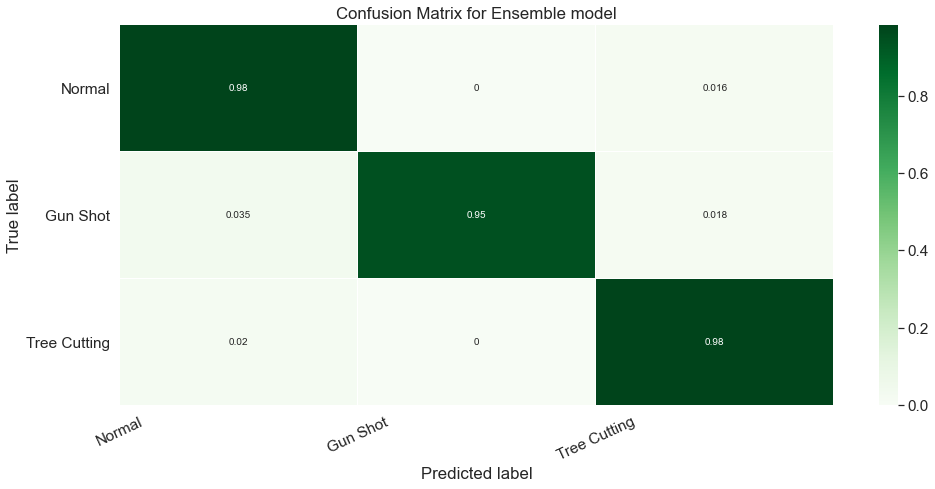

In [254]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(final_y_test,final_output)

matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Normal','Gun Shot','Tree Cutting']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label') 
plt.ylabel('True label')
plt.title('Confusion Matrix for Ensemble model')
plt.show()

In [257]:
final_output.tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [192]:
#Model accuracy on test data
from sklearn.metrics import classification_report
target_names = ['Normal', 'Gunshot', 'Tree Cutting']
print(classification_report(final_y_test, final_output, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.95      0.98      0.97        61
     Gunshot       1.00      0.95      0.97        57
Tree Cutting       0.96      0.98      0.97        50

    accuracy                           0.97       168
   macro avg       0.97      0.97      0.97       168
weighted avg       0.97      0.97      0.97       168



In [275]:
final_output

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [276]:
a=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [277]:
a

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [279]:
accuracy_score(a,okk)

0.9702380952380952